# Stochastic description

This notebook is an interactive version of the paper's code base.

Feel free to explore the system's evolution for different (modifiable) parameter values.

![Pipeline](Figure1.png "Pipeline")



In [1]:
using DrWatson
@quickactivate "ChaosNoiseEGT"

include(srcdir("PayoffMatrix.jl"))
include(srcdir("StochasticSRC.jl"))
include(srcdir("Graphs.jl"))
include(srcdir("Quantifiers.jl"))

using DynamicalSystems
using PyPlot

## 1. Input

### *Fixed input*

#### Payoff matrix
Payoff matrix of the ACT/Skyrms attractor

In [2]:
display(payoff_matrix)

4×4 Matrix{Float64}:
  0.0   -0.6  0.0   1.0
  1.0    0.0  0.0  -0.5
 -1.05  -0.2  0.0   1.75
  0.5   -0.1  0.1   0.0

### *Modifiable input* (interactive)

#### Parameters
You can freely modify the following parameter(s):

* $N$: population size
* $\beta$: selection intensity coefficient

In [3]:
N=3_000
B=5.0

println(string("Population size (N): ", N))
println(string("Selection coefficient (B): ", B))

Population size (N): 3000
Selection coefficient (B): 5.0


#### Initial conditions
The ACT/Skyrms' attractor can be properly seen starting with initial conditions close to the center of the simplex.
Therefore, for a robust analysis of the attractor we recommend the following initial conditions:
`ini_con = [0.25,0.25,0.25,0.25]`

The sum of all initial conditions should be equal to 1, because the quantities represent frequencies/relative amounts.



In [4]:
ini_con = [0.25,0.25,0.25,0.25]

4-element Vector{Float64}:
 0.25
 0.25
 0.25
 0.25

## 2. Update rule

### Generalised pairwise comparison process
Individual-based model simulations

The amount of time steps for which the process is simulated is determined by the population size. The reason for this is to keep constant the number of simulated generations.

In [5]:
T = set_timesteps_FD(N)
#T = set_timesteps_others(N,B)

500000

## 3. Data
Solution of the ODE system for the stated parameter(s) and initial condition values.

In [6]:
Data = run_full_simulation(ini_con, B, N, T)

161410×4 Matrix{Float64}:
 0.25      0.25         0.25      0.25
 0.25      0.25         0.25      0.25
 0.25      0.25         0.25      0.25
 0.25      0.25         0.25      0.25
 0.25      0.25         0.250333  0.249667
 0.25      0.25         0.250333  0.249667
 0.25      0.249667     0.250667  0.249667
 0.249667  0.249667     0.251     0.249667
 0.249667  0.249667     0.251     0.249667
 0.249667  0.249667     0.251     0.249667
 ⋮                                
 0.058     0.000333333  0.831667  0.11
 0.058     0.000333333  0.831667  0.11
 0.058     0.000333333  0.831667  0.11
 0.058     0.000333333  0.831667  0.11
 0.058     0.000333333  0.831667  0.11
 0.058     0.000333333  0.831667  0.11
 0.058     0.000333333  0.831667  0.11
 0.058     0.000333333  0.831667  0.11
 0.058     2.56858e-15  0.831667  0.110333

## 4.1 Graph
* Ternary plot

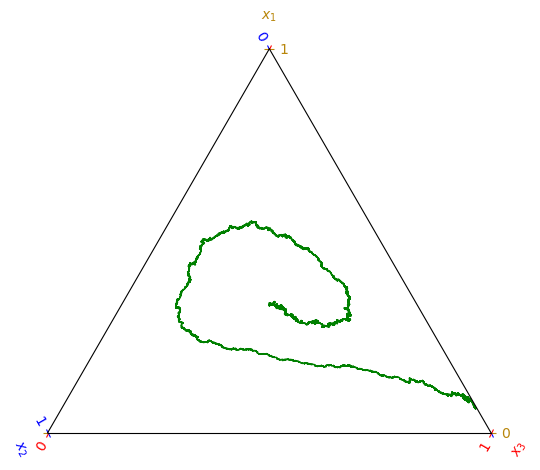

In [7]:
plt.clf()
ternary_plot(Data[:,1],Data[:,2],Data[:,3])
gcf()

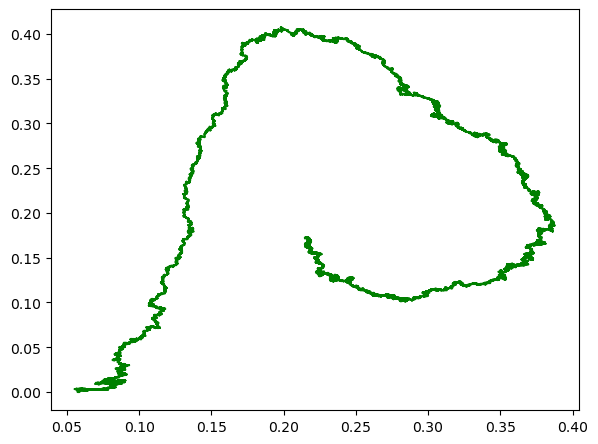

In [15]:
plt.clf()
plot(Data[20000:end,1],Data[20000:end,2],color="g")
gcf()

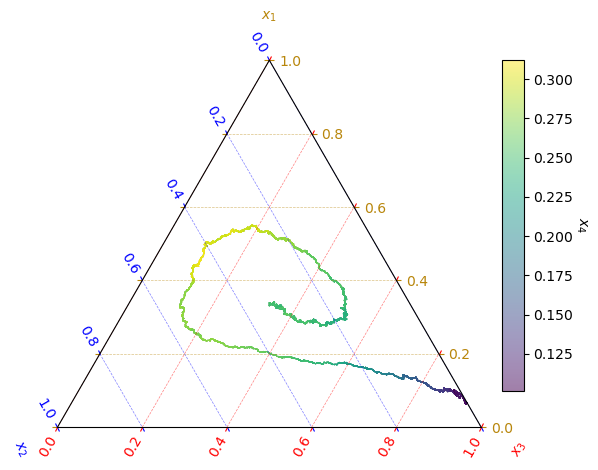

In [9]:
plt.clf()
ternary_plot_depth(Data[:,1],Data[:,2],Data[:,3],Data[:,4])
gcf()

* Time series
    - Full time series

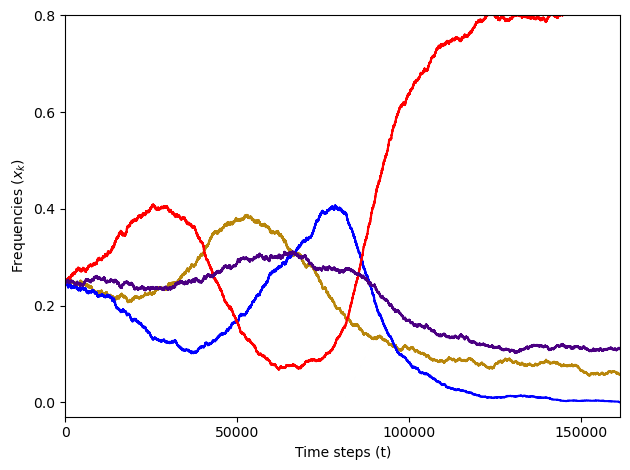

In [10]:
plt.clf()
timeseries(Data[:,1],Data[:,2],Data[:,3],Data[:,4])
gcf()

- Adjust the x axis freely using `xmin_value` and `xmax_value`. (Both values should be integers!)

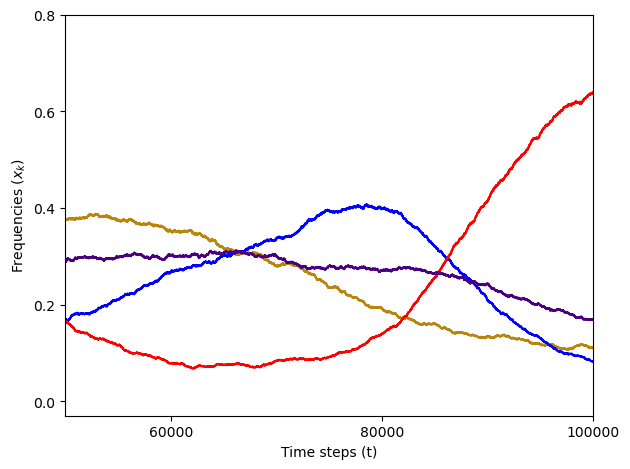

In [11]:
#xmin_value and xmax_value must be integers!
xmin_value = 50000
xmax_value = 100000

plt.clf()
timeseries(Data[:,1],Data[:,2],Data[:,3],Data[:,4];xmin=xmin_value, xmax=xmax_value)
gcf()

## 4.2 Quantify
* Fractal dimension

*Note: The fractal dimension is a quantifier that takes long to calculate*

In [222]:
FD_info = fractal_dimension(Data)[1]
println("The fractal dimension of the system is: "*string(FD_info))

* Permutation entropy

In [30]:
PE = permutation_entropy(Data)
println("The normalised permutation entropy of the system is: "*string(PE))

The normalised permutation entropy of the system is: 0.4430340954524046


* Standard deviation

In [31]:
STD_info = standard_deviation(Data)
for i in 1:4
    println("The standard deviation of x"*string(i)*" is: "*string(STD_info[i]))
end
print("Average standard deviation is: "*string(mean(STD_info)))

The standard deviation of x1 is: 0.081
The standard deviation of x2 is: 0.11
The standard deviation of x3 is: 0.152
The standard deviation of x4 is: 0.031
Average standard deviation is: 0.0935

* Fixation time

In [51]:
fixation_time(Data)

5000000

* Fourier spectrum

To change the range of the x-axis, modify the `xlim_val`.

In [13]:
plt.clf()
fourier_spectrum(Data)
gcf()

Figure(PyObject <Figure size 640x480 with 0 Axes>)